A classe JogoDeForca define a lógica do jogo em si, contendo a escolha das palavras escolhidas, o rastreamento das vidas e a tentativa de adivinhar letras ou a palavra completa.

In [24]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)
print(jogo.tentar_letra('b'))
print(jogo.tentar_letra('a'))
print(jogo.tentar_letra('w'))
print(jogo.vidas)

11
otimizaveis
5
[]
[6]
[]
3


O bloco de código abaixo implemeta um jogador automático que joga forca usando um vocabulário de palavras, tanto quanto calcula as probabilidades para adivinhar as letras e filtrando a lista de palavras possíveis com base no que o jogo retorna.

A função "jogar" retorna True se o jogador acertar a palavra, ou False se ele ficar sem vidas antes de acertar. 

A importância da função seria mostrar uma solução eficiente para resolver o problema do jogo de forma automotizada, aplicando conceitos de probabilidade e refinamento de hipótese. 

In [ ]:
import requests
import random
from collections import Counter
import math

class JogadorAutomatico:
    def __init__(self):
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        response = requests.get(url)
        if response.status_code == 200:
            self.vocabulario = response.text.splitlines()
        else:
            raise Exception("Erro ao baixar vocabulário.")

    def calcular_probabilidades(self, palavras_possiveis):
        # função calcula a frequência de cada letra nas palavras possíveis
        todas_letras = ''.join(palavras_possiveis)
        frequencias = Counter(todas_letras)
        total_letras = sum(frequencias.values())
        
        # devolve a probabilidade de cada letra ser a correta
        return {letra: frequencias[letra] / total_letras for letra in frequencias}

    def escolher_melhor_letra(self, palavras_possiveis, letras_tentadas):
        # calcula as probabilidades e escolhe a letra mais frequente que ainda não foi tentada
        probabilidades = self.calcular_probabilidades(palavras_possiveis)
        melhor_letra = max((letra for letra in probabilidades if letra not in letras_tentadas), key=lambda letra: probabilidades[letra], default=None)
        return melhor_letra

    def jogar(self, jogo):
        
        palavra_tamanho = jogo.novo_jogo()
        palavras_possiveis = [palavra for palavra in self.vocabulario if len(palavra) == palavra_tamanho]
        letras_tentadas = set()
        
        while jogo.vidas > 0:
            # jogador escolhe a próxima letra
            letra = self.escolher_melhor_letra(palavras_possiveis, letras_tentadas)
            letras_tentadas.add(letra)
            
            # tenta a letra e recebe os índices onde ela aparece
            indices = jogo.tentar_letra(letra)
            if indices is False:
                # o jogo acaba se as vidas chegarem a 0 
                return False
            
            if len(indices) > 0:
                # filtragem de palavras que correspondem com a nova informação
                palavras_possiveis = [palavra for palavra in palavras_possiveis 
                                      if all(palavra[idx] == letra for idx in indices)]
            else:
                # filtragem de palavras que não contêm a letra se a tentativa for errada
                palavras_possiveis = [palavra for palavra in palavras_possiveis if letra not in palavra]
            
            # tenta adivinhar a palavra se houver alta certeza sobre ela
            if len(palavras_possiveis) == 1:
                return jogo.tentar_palavra(palavras_possiveis[0])
        
        return False


A função jogar_varios_jogos nos permite testar a eficácia da estratégia do jogador. A taxa de sucesso apresenta o quão bem a estratégia funciona, ao mesmo tempo que o histograma nos fornece uma visão mais detalhada de como as vitórias são conquistadas. 

Para saber se a estratégia é consistente e segura, armazenamos o número de vidas restantes nas vitórias. 

O código retorna uma taxa de sucesso, isto é, uma porcentagem que indica a frequência com que o jogador vence. Junto com um gráfico que mostra a distribuição de vidas restantes nas vitórias

As falhas do jogador acontecem pelo motivo de ele só usar a frequência das letras para adivinhar, sem considerar o contexto específico de cada palavra. A estratégia de probabilidade funciona de forma correta na maioria das vezes, porém tem seus equívocos. Ela ignora a estrutura exata da palavra que está tentando adivinhar e só olha para as letras mais comuns no vocabulário todo. Por essa razão, o jogador erra quando ainda sobram palavras parecidas ou quando escolhe uma letra frequente que não está na palavra certa

Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Taxa de sucesso: 94.00%


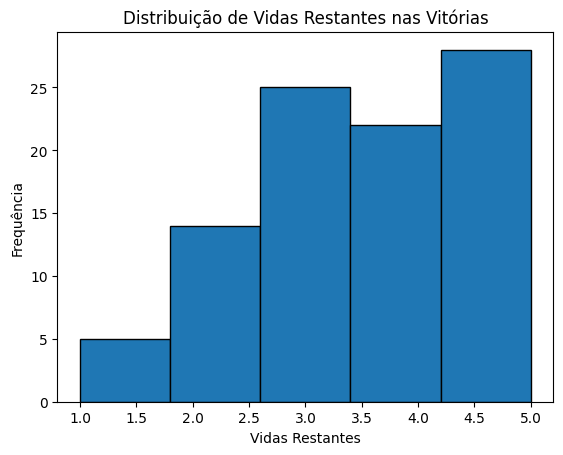

In [ ]:
import matplotlib.pyplot as plt

def jogar_varios_jogos(n=100):
    vitorias = 0
    vidas_restantes = []
    for _ in range(n):
        jogo = JogoDeForca()
        jogador = JogadorAutomatico()
        resultado = jogador.jogar(jogo)
        if resultado:
            vitorias += 1
            vidas_restantes.append(jogo.vidas)
    
    taxa_sucesso = vitorias / n
    print(f"Taxa de sucesso: {taxa_sucesso * 100:.2f}%")
    plt.hist(vidas_restantes, bins=5, edgecolor='black')
    plt.title("Distribuição de Vidas Restantes nas Vitórias")
    plt.xlabel("Vidas Restantes")
    plt.ylabel("Frequência")
    plt.show()

# roda o teste com 100 jogos
jogar_varios_jogos(100)
